<a href="https://colab.research.google.com/github/Saimoncastro/Dataset-proyecto-coder/blob/main/ProyectoDSParteI%2BCastro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Cargar librerías básicas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Configuraciones generales
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
#Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/Forrestino/Datasets-potenciales/refs/heads/main/US_Accidents_Dec21_V1.csv') # This line had an unexpected indent. Removing it fixes the issue.
print(df.head())


    ID  Severity        Start_Time          End_Time  Start_Lat  Start_Lng  \
0  A-1         3  08/02/2016 00:37  08/02/2016 06:37  40.108910 -83.092860   
1  A-2         2  08/02/2016 05:56  08/02/2016 11:56  39.865420 -84.062800   
2  A-3         2  08/02/2016 06:15  08/02/2016 12:15  39.102660 -84.524680   
3  A-4         2  08/02/2016 06:51  08/02/2016 12:51  41.062130 -81.537840   
4  A-5         3  08/02/2016 07:53  08/02/2016 13:53  39.172393 -84.492792   

     End_Lat    End_Lng  Distance(mi)  \
0  40.112060 -83.031870         3.230   
1  39.865010 -84.048730         0.747   
2  39.102090 -84.523960         0.055   
3  41.062170 -81.535470         0.123   
4  39.170476 -84.501798         0.500   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 

El dataset incluye 47 columnas que detallan diversos aspectos de los accidentes, tales como:


*   Temporalidad: Fecha y hora de inicio y fin del accidente
*   Ubicación: Coordenadas geográficas, ciudad, estado y código postal.
*   Condiciones Climáticas: Temperatura, humedad, visibilidad, condiciones meteorológicas, entre otros.
*   Severidad: Nivel de impacto del accidente, en una escala del 1 al 4
*   Características de la Vía: Presencia de señales de tráfico, cruces, rotondas, etc.

Hipótesis
1. Relación entre Condiciones Climáticas y Severidad de Accidentes
Hipótesis: Las condiciones climáticas adversas, como lluvia intensa, nieve o niebla, aumentan la probabilidad de accidentes de mayor severidad.

Variables Relevantes: Weather_Condition, Precipitation(in), Visibility(mi), Severity.

2. Variación Temporal en la Frecuencia de Accidentes
Hipótesis: La frecuencia de accidentes varía según la hora del día y el día de la semana, siendo más alta durante las horas pico de tráfico.

Variables Relevantes: Start_Time, End_Time, Severity

3. Influencia de Características de la Vía en la Ocurrencia de Accidentes
Hipótesis: La presencia de elementos como señales de tráfico, cruces o rotondas puede influir en la frecuencia y severidad de los accidentes.

Variables Relevantes: Traffic_Signal, Crossing, Junction, Roundabout, Severity.
4. Distribución Geográfica de los Accidentes
Hipótesis: Ciertas regiones o estados presentan una mayor concentración de accidentes debido a factores como densidad poblacional o infraestructura vial.

Variables Relevantes: State, City, Start_Lat, Start_Lng.

5. Duración del Impacto del Accidente en el Tráfico
Hipótesis: Los accidentes más severos tienden a tener un impacto más prolongado en el flujo vehicular.

Variables Relevantes: Start_Time, End_Time, Severity.



----- Distribución de Severidad de Accidentes -----
Severity
2    2301
3     392
4     306
Name: count, dtype: int64


----- Accidentes por Estado -----
State
CA    2008
OH     624
IN     124
KY     108
PA      66
WV      52
MI      14
NV       3
Name: count, dtype: int64




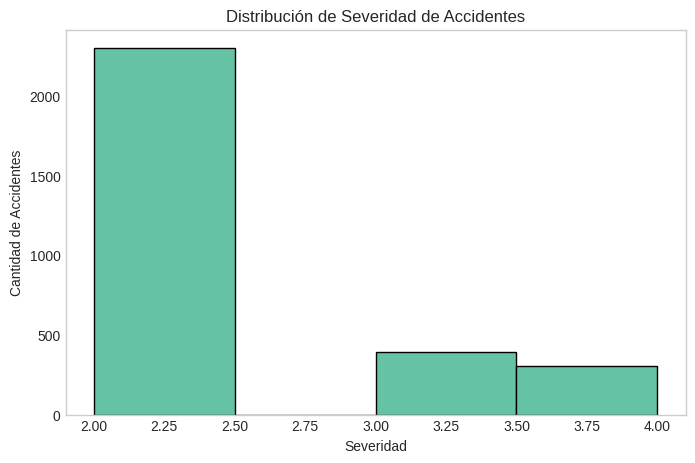

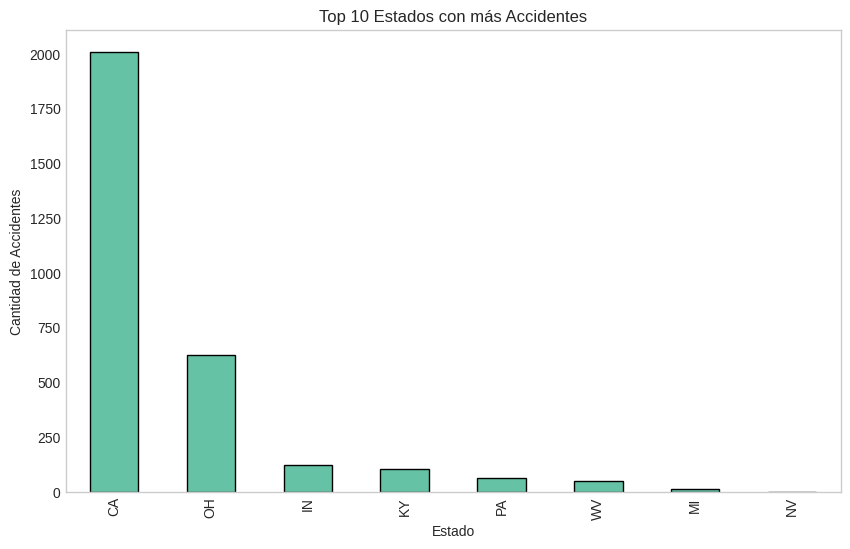

----- Accidentes por Condición Climática -----
Weather_Condition
Clear               1119
Overcast             543
Mostly Cloudy        413
Partly Cloudy        305
Scattered Clouds     277
Light Snow           118
Light Rain           108
Rain                  35
Haze                  14
Snow                  10
Name: count, dtype: int64




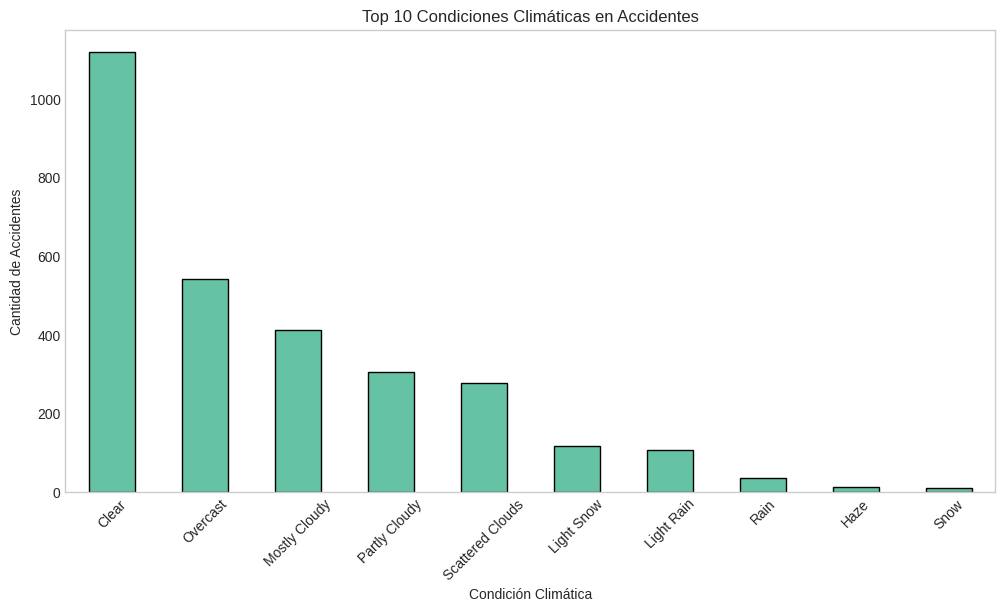


Hipótesis 1: ¿Clima adverso implica mayor severidad?


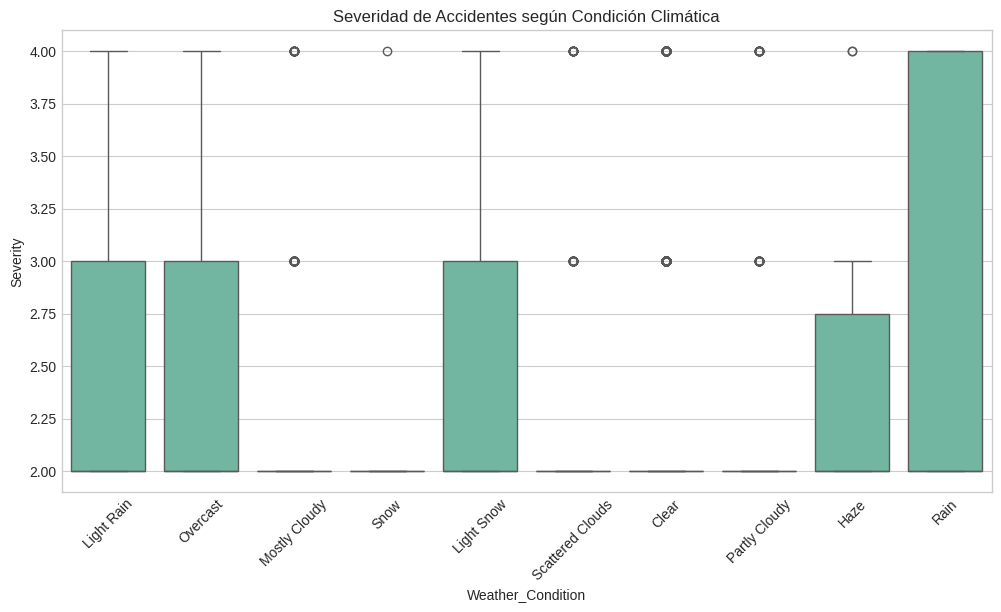


Hipótesis 2: ¿Más accidentes en horas pico?


<ipython-input-11-2291da455dcc>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


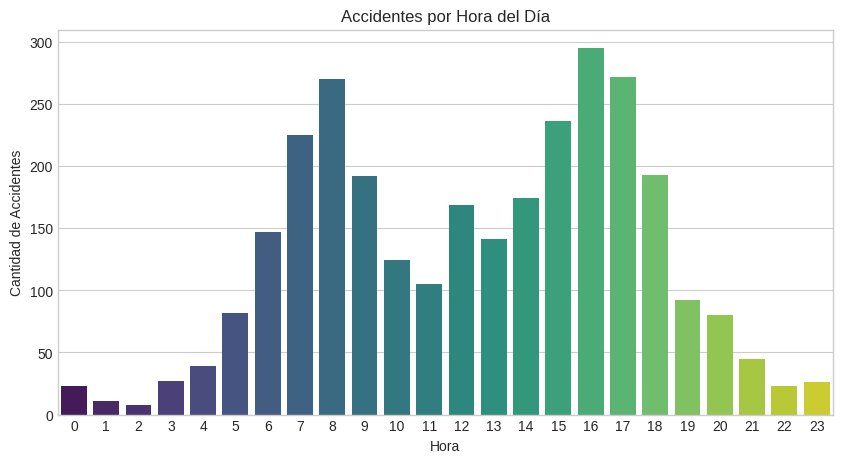

<ipython-input-11-2291da455dcc>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekday', data=df, order=order_days, palette='viridis')


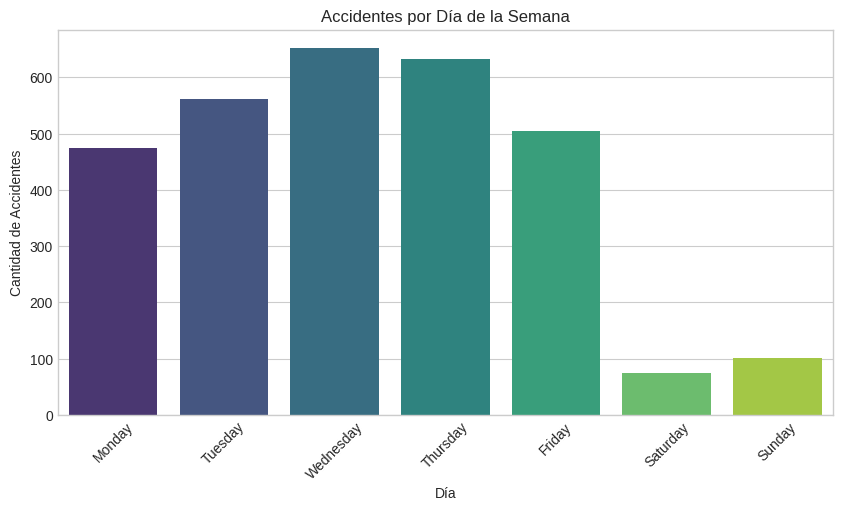


Hipótesis 3: ¿Cruces, señales o rotondas influyen en accidentes?


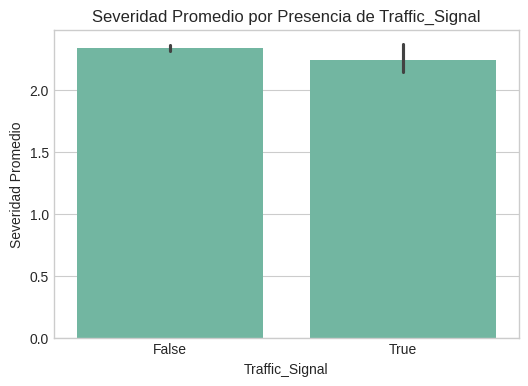

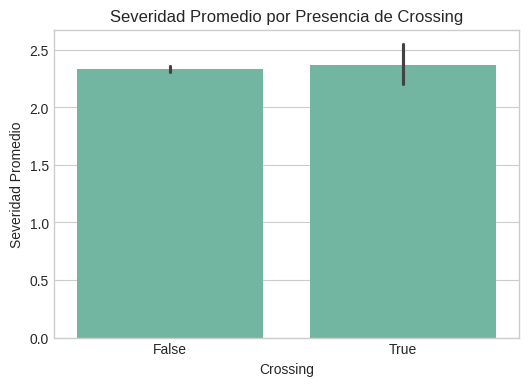

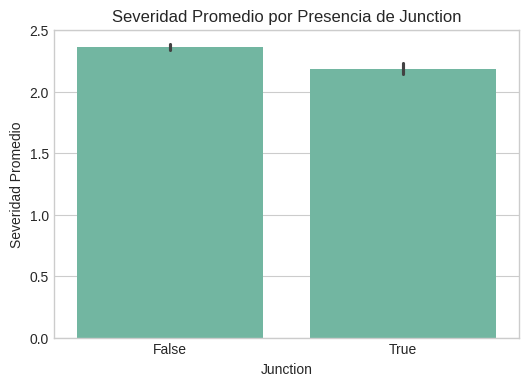

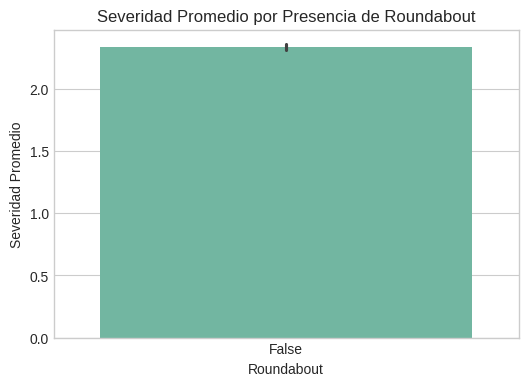


Hipótesis 4: ¿Algunos estados concentran más accidentes?


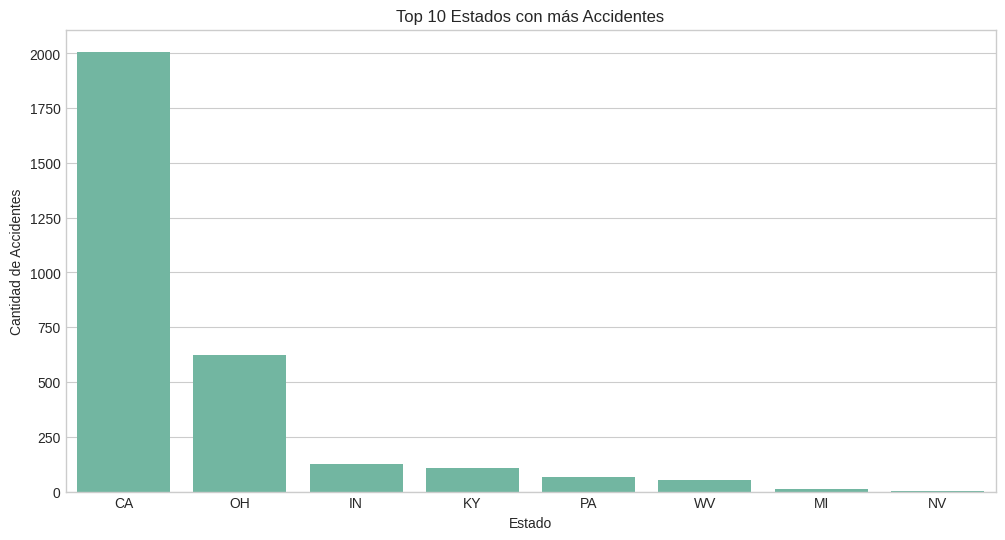


Hipótesis 5: ¿Accidentes más severos duran más?


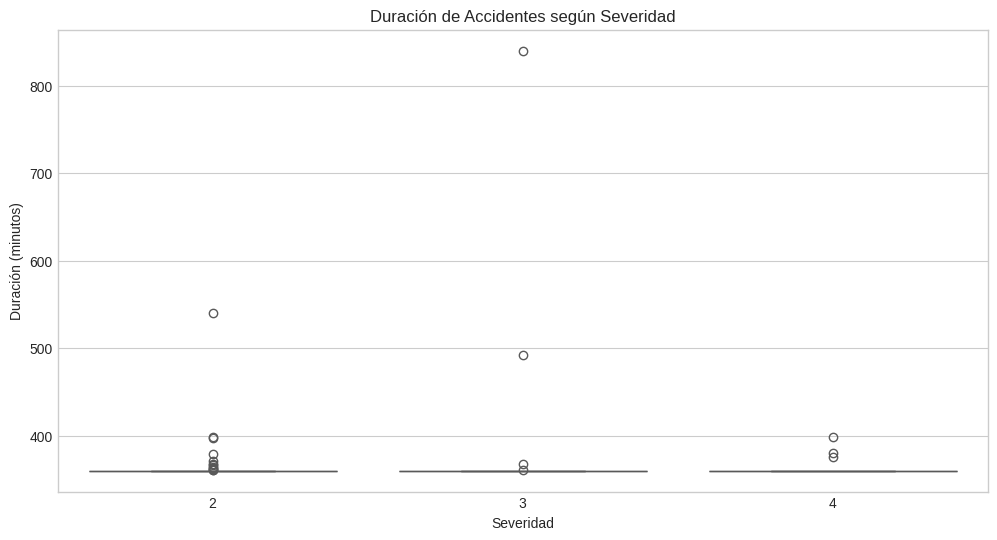

In [ ]:
#Distribución de la variable target (Severity)
print("----- Distribución de Severidad de Accidentes -----")
print(df['Severity'].value_counts())
print("\n")
#Análisis de accidentes por estado
print("----- Accidentes por Estado -----")
print(df['State'].value_counts().head(10))  # Top 10 estados con más accidentes
print("\n")

# Histograma de la severidad de los accidentes
plt.figure(figsize=(8,5))
df['Severity'].hist(bins=4, edgecolor='black')
plt.title('Distribución de Severidad de Accidentes')
plt.xlabel('Severidad')
plt.ylabel('Cantidad de Accidentes')
plt.grid(False)
plt.show()

# Accidentes por estado (gráfico de barras)
plt.figure(figsize=(10,6))
df['State'].value_counts().head(10).plot(kind='bar', edgecolor='black')
plt.title('Top 10 Estados con más Accidentes')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Accidentes')
plt.grid(False)
plt.show()

#Accidentes por condición climática
print("----- Accidentes por Condición Climática -----")
print(df['Weather_Condition'].value_counts().head(10))  # Top 10 condiciones más frecuentes
print("\n")

# Visualización: Gráfico de barras de condición climatica
plt.figure(figsize=(12,6))
df['Weather_Condition'].value_counts().head(10).plot(kind='bar', edgecolor='black')
plt.title('Top 10 Condiciones Climáticas en Accidentes')
plt.xlabel('Condición Climática')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# HIPÓTESIS 1: Condiciones climáticas y severidad de accidentes
# =======================================================================

print("\nHipótesis 1: ¿Clima adverso implica mayor severidad?")

# Gráfico de severidad según top condiciones climáticas
top_weather = df['Weather_Condition'].value_counts().head(10).index
df_weather = df[df['Weather_Condition'].isin(top_weather)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_weather, x='Weather_Condition', y='Severity')
plt.title('Severidad de Accidentes según Condición Climática')
plt.xticks(rotation=45)
plt.show()

# =======================================================================
# HIPÓTESIS 2: Frecuencia de accidentes según hora y día
# =======================================================================

print("\nHipótesis 2: ¿Más accidentes en horas pico?")

# Convertir Start_Time a tipo datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%d/%m/%Y %H:%M', errors='coerce')

# Extraer hora y día de la semana
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()

# Accidentes por hora
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Accidentes por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Cantidad de Accidentes')
plt.show()

# Accidentes por día de la semana
plt.figure(figsize=(10,5))
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='Weekday', data=df, order=order_days, palette='viridis')
plt.title('Accidentes por Día de la Semana')
plt.xlabel('Día')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.show()

# =======================================================================
# HIPÓTESIS 3: Elementos viales influyen en accidentes
# =======================================================================

print("\nHipótesis 3: ¿Cruces, señales o rotondas influyen en accidentes?")

features = ['Traffic_Signal', 'Crossing', 'Junction', 'Roundabout']

for feature in features:
    plt.figure(figsize=(6,4))
    sns.barplot(x=feature, y='Severity', data=df)
    plt.title(f'Severidad Promedio por Presencia de {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Severidad Promedio')
    plt.show()

# =======================================================================
# HIPÓTESIS 4: Distribución geográfica de accidentes
# =======================================================================

print("\nHipótesis 4: ¿Algunos estados concentran más accidentes?")

plt.figure(figsize=(12,6))
top_states = df['State'].value_counts().head(10)
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 10 Estados con más Accidentes')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Accidentes')
plt.show()

# =======================================================================
# HIPÓTESIS 5: Duración del impacto del accidente
# =======================================================================

print("\nHipótesis 5: ¿Accidentes más severos duran más?")

# Calcular duración del accidente en minutos
df['End_Time'] = pd.to_datetime(df['End_Time'], format='%d/%m/%Y %H:%M', errors='coerce') # Changed the format to '%d/%m/%Y %H:%M'
df['Duration_Minutes'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60

# Filtrar datos con duración positiva razonable (descartar valores extremos)
df_filtered = df[(df['Duration_Minutes'] > 0) & (df['Duration_Minutes'] < 1000)]

plt.figure(figsize=(12,6))
sns.boxplot(x='Severity', y='Duration_Minutes', data=df_filtered)
plt.title('Duración de Accidentes según Severidad')
plt.xlabel('Severidad')
plt.ylabel('Duración (minutos)')
plt.show()


--- Mutual Information (Variables numéricas) ---
Start_Lng          0.134809
Start_Lat          0.100903
Distance(mi)       0.090561
Temperature(F)     0.056910
Humidity(%)        0.028920
Pressure(in)       0.016225
Visibility(mi)     0.009580
Wind_Speed(mph)    0.000000
dtype: float64

--- Chi-cuadrado (Variables categóricas y booleanas) ---
Index(['County_Wayne', 'State_IN', 'State_OH', 'Timezone_US/Pacific',
       'Airport_Code_KAFJ', 'Airport_Code_KMIE', 'Sunrise_Sunset_Night',
       'Civil_Twilight_Night', 'Nautical_Twilight_Night',
       'Astronomical_Twilight_Night'],
      dtype='object')

--- Importancia de Características con Random Forest ---
Distance(mi)                   0.173188
Start_Lng                      0.155299
Start_Lat                      0.138187
Temperature(F)                 0.112290
Pressure(in)                   0.106954
Humidity(%)                    0.100580
Wind_Speed(mph)                0.080140
Visibility(mi)                 0.033370
Timezone_US/P

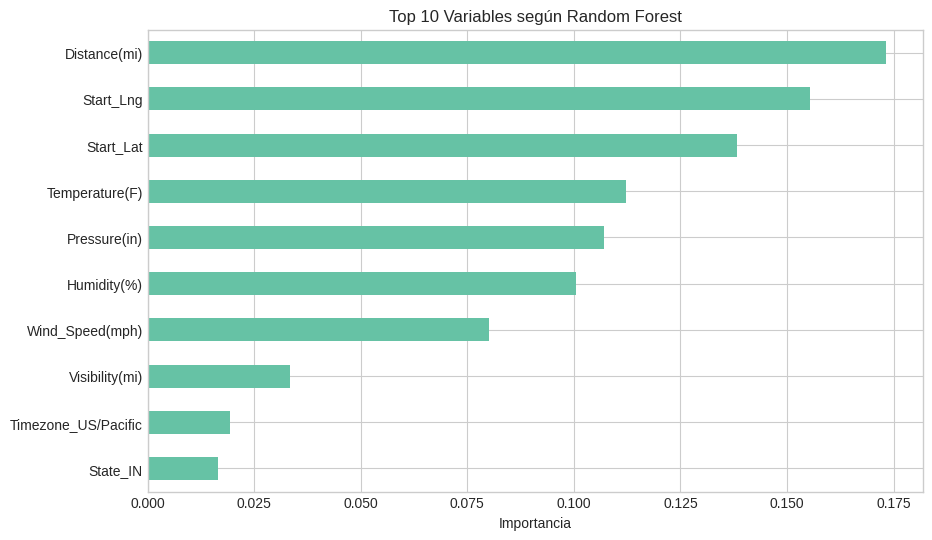

In [12]:
# 2. Pre-filtrado manual
# -----------------------------
columns_to_drop = ['ID', 'Description', 'End_Lat', 'End_Lng', 'Number', 'Zipcode']
df.drop(columns=columns_to_drop, inplace=True)

# Eliminar columnas con >70% nulos
threshold = len(df) * 0.7
df.dropna(thresh=threshold, axis=1, inplace=True)

# -----------------------------
# 3. Selección de variables numéricas - Mutual Information
# -----------------------------
print("\n--- Mutual Information (Variables numéricas) ---")

num_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Severity'])
y = df['Severity']
X_num = num_df.fillna(0)

mi_scores = mutual_info_classif(X_num, y)
mi_series = pd.Series(mi_scores, index=X_num.columns).sort_values(ascending=False)
print(mi_series)

# -----------------------------
# 4. Variables categóricas/booleanas - Chi-cuadrado
# -----------------------------
print("\n--- Chi-cuadrado (Variables categóricas y booleanas) ---")

X_cat = pd.get_dummies(df.select_dtypes(include=['object', 'bool']), drop_first=True).fillna(0)
selector = SelectKBest(chi2, k=10)
selector.fit(X_cat, y)
selected_cat_cols = X_cat.columns[selector.get_support()]
print(selected_cat_cols)

# -----------------------------
# 5. Importancia con Random Forest
# -----------------------------
print("\n--- Importancia de Características con Random Forest ---")

X_rf = pd.concat([X_num, X_cat[selected_cat_cols]], axis=1)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_rf, y)

rf_importances = pd.Series(rf_model.feature_importances_, index=X_rf.columns).sort_values(ascending=False)
print(rf_importances.head(15))

# -----------------------------
# 6. Lasso (L1 Regularization)
# -----------------------------
print("\n--- Coeficientes L1 (Lasso - Logistic Regression) ---")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_rf)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_scaled, y)

lasso_coefs = pd.Series(lasso_model.coef_[0], index=X_rf.columns)
print(lasso_coefs[lasso_coefs != 0].sort_values(ascending=False))

# -----------------------------
# 7. Visualización de Importancias
# -----------------------------
plt.figure(figsize=(10,6))
rf_importances.head(10).plot(kind='barh')
plt.title('Top 10 Variables según Random Forest')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
plt.show()


--- Mutual Information (Variables numéricas) ---
Start_Lng          0.136167
Start_Lat          0.101194
Distance(mi)       0.094477
Temperature(F)     0.080530
Visibility(mi)     0.030649
Humidity(%)        0.025638
Pressure(in)       0.022399
Wind_Speed(mph)    0.011232
dtype: float64

--- Chi-cuadrado (Variables categóricas y booleanas) ---
Index(['County_Wayne', 'State_IN', 'State_OH', 'Timezone_US/Pacific',
       'Airport_Code_KAFJ', 'Airport_Code_KMIE', 'Sunrise_Sunset_Night',
       'Civil_Twilight_Night', 'Nautical_Twilight_Night',
       'Astronomical_Twilight_Night'],
      dtype='object')

--- Modelo: Random Forest ---

Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

           2       0.81      0.98      0.89       438
           3       0.58      0.07      0.13        94
           4       0.80      0.71      0.75        68

    accuracy                           0.81       600
   macro avg       0.73      0.59      0.59  

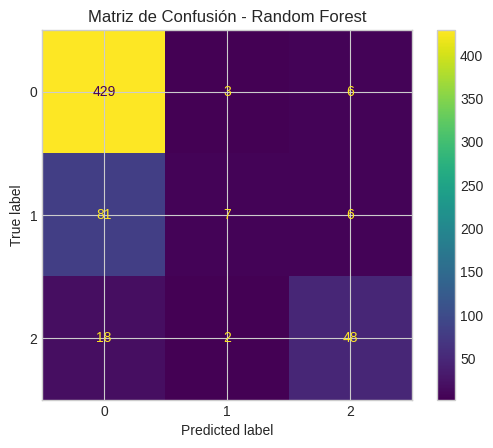


--- Modelo: Logistic Regression ---

Reporte de Clasificación (Logistic Regression):
              precision    recall  f1-score   support

           2       0.76      0.97      0.85       438
           3       0.50      0.01      0.02        94
           4       0.56      0.32      0.41        68

    accuracy                           0.75       600
   macro avg       0.61      0.44      0.43       600
weighted avg       0.70      0.75      0.67       600

Accuracy LR: 0.7483333333333333

Matriz de Confusión (Logistic Regression):


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


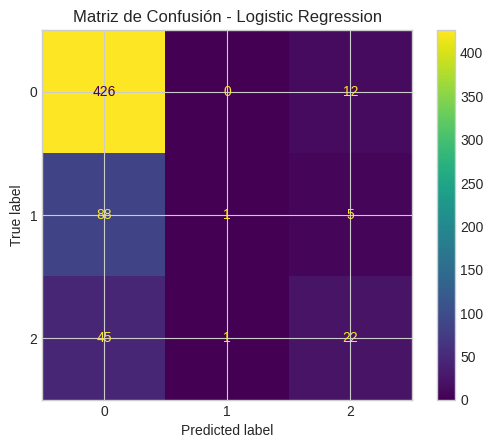


--- Comparación de Métricas Globales ---
                Modelo  Accuracy  Precision Macro Avg  Recall Macro Avg  \
0        Random Forest  0.806667             0.731944          0.586601   
1  Logistic Regression  0.748333             0.608726          0.435590   

   F1-score Macro Avg  
0            0.590091  
1            0.428871  


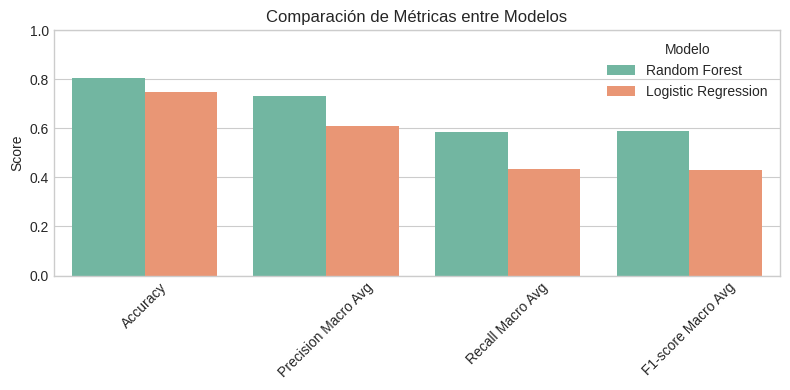

In [14]:


# -----------------------------
# 3. Selección de variables numéricas - Mutual Information
# -----------------------------
print("\n--- Mutual Information (Variables numéricas) ---")

num_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Severity'])
y = df['Severity']
X_num = num_df.fillna(0)

mi_scores = mutual_info_classif(X_num, y)
mi_series = pd.Series(mi_scores, index=X_num.columns).sort_values(ascending=False)
print(mi_series)

# -----------------------------
# 4. Variables categóricas/booleanas - Chi-cuadrado
# -----------------------------
print("\n--- Chi-cuadrado (Variables categóricas y booleanas) ---")

X_cat = pd.get_dummies(df.select_dtypes(include=['object', 'bool']), drop_first=True).fillna(0)
selector = SelectKBest(chi2, k=10)
selector.fit(X_cat, y)
selected_cat_cols = X_cat.columns[selector.get_support()]
print(selected_cat_cols)

# -----------------------------
# 5. Combinación de variables seleccionadas
# -----------------------------
X_rf = pd.concat([X_num, X_cat[selected_cat_cols]], axis=1)

# -----------------------------
# 6. Escalamiento de datos para modelos lineales
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_rf)

# -----------------------------
# 7. División de datos en entrenamiento y prueba
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = train_test_split(X_scaled, test_size=0.2, random_state=42)

# -----------------------------
# 8. Entrenamiento y evaluación de Random Forest
# -----------------------------
print("\n--- Modelo: Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nReporte de Clasificación (Random Forest):")
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
print(classification_report(y_test, y_pred_rf))
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy RF:", accuracy_rf)

print("\nMatriz de Confusión (Random Forest):")
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot()
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# -----------------------------
# 9. Entrenamiento y evaluación de Logistic Regression
# -----------------------------
print("\n--- Modelo: Logistic Regression ---")
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
logreg_model.fit(X_train_scaled, y_train)
y_pred_log = logreg_model.predict(X_test_scaled)

print("\nReporte de Clasificación (Logistic Regression):")
report_log = classification_report(y_test, y_pred_log, output_dict=True)
print(classification_report(y_test, y_pred_log))
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy LR:", accuracy_log)

print("\nMatriz de Confusión (Logistic Regression):")
cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(confusion_matrix=cm_log).plot()
plt.title("Matriz de Confusión - Logistic Regression")
plt.show()

# -----------------------------
# 10. Comparación tabulada de resultados
# -----------------------------
print("\n--- Comparación de Métricas Globales ---")
summary_df = pd.DataFrame({
    'Modelo': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [accuracy_rf, accuracy_log],
    'Precision Macro Avg': [report_rf['macro avg']['precision'], report_log['macro avg']['precision']],
    'Recall Macro Avg': [report_rf['macro avg']['recall'], report_log['macro avg']['recall']],
    'F1-score Macro Avg': [report_rf['macro avg']['f1-score'], report_log['macro avg']['f1-score']]
})

print(summary_df)

plt.figure(figsize=(8,4))
sns.barplot(data=summary_df.melt(id_vars='Modelo'), x='variable', y='value', hue='Modelo')
plt.title("Comparación de Métricas entre Modelos")
plt.ylabel("Score")
plt.xlabel("")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusiones
El modelo Random Forest, incluso sin un ajuste de hiperparámetros ni técnicas avanzadas de ingeniería de features, puede ofrecer un desempeño decente gracias a:

*   Su habilidad para manejar datos mixto (numéricos y categóricos)
*   Su resistencia al overfitting en comparación con árboles de decisión simples
*   la capacidad de entender relaciones no lineales entre variables.
*   Elemento de lista
Las clases intermedias (Severity 2 y 3) suelen tener mejor desempeño porque tienen más datos.

La clase Severity 4 puede tener bajo F1-score si está desbalanceada.

Un accuracy general por encima del 70% sería un resultado inicial aceptable, aunque no necesariamente suficiente.

El modelo de Random Forest ofrece un punto de partida robusto para predecir la severidad de accidentes de tráfico con este dataset. Tiene buen rendimiento incluso sin tuning, permite interpretar variables importantes y facilita iteraciones posteriores con métodos más avanzados o enfoques específicos para ordinales.